In [2]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 'a5ce', 'a457', 'adab', 'aa46', 'a46a']

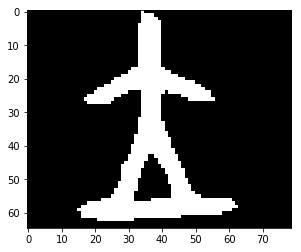

In [4]:
for category in Categories_all:
    path = os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
img_array.shape

(65, 79)

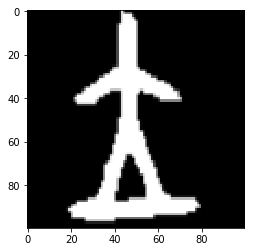

In [6]:
IMG_X = 100
IMG_Y = 100

new_array = cv2.resize(img_array, (IMG_Y, IMG_X)) # after checkning they need to be rearanged
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
np.average(new_array, axis=1)

array([  3.28,   7.89,  13.4 ,  15.43,  17.46,  19.49,  21.72,  22.67,
        22.67,  22.67,  22.67,  22.67,  22.67,  22.66,  22.66,  22.67,
        22.67,  22.67,  22.67,  22.67,  22.67,  22.67,  22.67,  22.67,
        22.67,  23.37,  29.43,  35.75,  42.33,  50.64,  59.06,  67.59,
        76.01,  84.28,  92.34,  99.14, 101.83,  97.16,  88.01,  79.38,
        75.12,  58.74,  39.06,  24.3 ,  19.23,  19.24,  19.23,  19.23,
        19.32,  21.55,  23.7 ,  25.74,  25.82,  25.81,  25.81,  27.86,
        30.07,  32.07,  34.08,  35.54,  35.54,  37.  ,  39.02,  41.02,
        41.72,  41.7 ,  41.75,  40.56,  38.69,  41.06,  42.25,  42.25,
        40.17,  38.91,  38.9 ,  36.86,  35.28,  35.04,  36.63,  38.15,
        38.35,  40.09,  41.96,  42.11,  46.13,  55.89,  94.14, 122.25,
       142.41, 148.44, 150.54, 148.72, 140.43, 124.87,  99.72,  61.51,
        27.6 ,   4.46,   0.  ,   0.  ])

In [8]:
np.average(new_array, axis=0)

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.5 ,   3.87,  12.14,  17.5 ,  22.85,  31.68,
        31.68,  34.27,  38.97,  44.04,  46.92,  50.19,  51.  ,  52.44,
        56.17,  62.65,  68.79,  81.33,  91.4 ,  94.78, 101.24, 112.91,
       115.74, 129.56, 171.23, 199.58, 196.76, 189.19, 185.66, 188.42,
       188.12, 190.52, 159.64, 107.9 ,  98.44, 104.2 , 105.91, 103.08,
        96.36,  87.29,  80.67,  70.36,  61.34,  57.85,  51.61,  45.69,
        43.22,  41.19,  34.81,  31.84,  31.17,  27.98,  22.51,  19.44,
        19.38,  17.32,  15.75,  15.75,  15.75,  10.01,   5.63,   2.48,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ])

In [10]:
data = []

def create_training_data():
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                data.append([new_array, category, class_type])
            except Exception as e:
                print('something went wrong')


In [11]:
create_training_data()

In [12]:
random.shuffle(data)

In [13]:
data[0]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'a4eb', 'chuxi']

In [14]:
len(data)

8232

In [15]:
testing_data = data[-100:]
training_data = data[0:-100]

In [16]:
len(testing_data) + len(training_data) == len(data)

True

In [17]:
print("{} + {} = {}".format(len(testing_data), len(training_data), len(data)))

100 + 8132 = 8232


In [18]:
finger_print = []

def create_finger_print(data):
    for picture in data:
        horizontal_average = np.average(picture[0], axis=1)
        vertical_average = np.average(picture[0], axis=0)
        finger_print.append([horizontal_average, vertical_average, picture[1], picture[2]])

In [19]:
create_finger_print(training_data)

In [50]:
print(len(finger_print[0]))
print(finger_print[0])

4
[array([  0.  ,  10.8 ,  25.18,  37.69,  44.72,  48.42,  48.68,  47.42,
        45.3 ,  49.38,  51.44,  51.5 ,  51.4 ,  52.24,  54.34,  54.7 ,
        54.73,  54.61,  54.59,  55.24,  57.57,  62.6 ,  68.75,  75.43,
        78.99,  81.18,  85.56,  92.06,  99.77, 100.12, 102.29, 106.27,
       106.5 , 102.09,  91.51,  80.76,  72.35,  68.33,  65.99,  63.46,
        59.35,  56.58,  54.78,  54.78,  53.6 ,  51.99,  52.  ,  53.18,
        54.87,  48.4 ,  46.14,  48.15,  44.28,  42.77,  44.85,  45.33,
        45.49,  45.37,  43.72,  42.16,  41.85,  41.86,  42.  ,  42.18,
        42.25,  42.25,  42.24,  41.06,  38.89,  34.18,  32.92,  35.05,
        33.16,  30.35,  26.45,  24.09,  23.37,  25.43,  24.16,  22.67,
        22.67,  22.54,  22.44,  22.6 ,  23.97,  26.01,  28.31,  29.11,
        28.84,  28.97,  30.18,  32.38,  34.29,  34.57,  32.64,  22.93,
        12.39,   2.  ,   0.  ,   0.  ]), array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   

In [21]:
def fingerprint_test(sample_picture, fingerprint_data):
    horizontal_average = np.average(sample_picture[0], axis=1)
    vertical_average = np.average(sample_picture[0], axis=0)
    best_guess = []
    for x in fingerprint_data:
        best_guess.append([int(sum(abs(horizontal_average-x[0])) + sum(abs(vertical_average-x[1]))), x[2] + "-" + x[3]])
    return best_guess    

In [22]:
fingerprint_test(testing_data[45], finger_print)

[[5725, 'a4eb-chuxi'],
 [5139, 'b6c0-chuxi'],
 [4859, 'a4a7-chuxi'],
 [5105, 'a4e8-smallseal'],
 [6105, 'b6c0-chuxi'],
 [3804, 'a440-chuxi'],
 [4497, 'a440-chuxi'],
 [10099, 'acdb-chuxi'],
 [9187, 'a4d1-chuxi'],
 [4523, 'a453-chuxi'],
 [4512, 'a447-chuxi'],
 [6168, 'a977-chuxi'],
 [4356, 'a4a7-chuxi'],
 [4922, 'adfb-jinwen'],
 [7951, 'a548-chuxi'],
 [6308, 'a447-jinwen'],
 [4961, 'b54c-jinwen'],
 [9265, 'b0a8-chuxi'],
 [2882, 'b6c0-jinwen'],
 [9927, 'bb50-chuxi'],
 [12417, 'a8e2-jinwen'],
 [4748, 'a440-chuxi'],
 [3094, 'adab-jinwen'],
 [6775, 'a4a7-chuxi'],
 [4752, 'a45f-jinwen'],
 [4781, 'b0a8-chuxi'],
 [5563, 'a5c1-jinwen'],
 [10105, 'b0a8-chuxi'],
 [9697, 'a4fd-jinwen'],
 [5666, 'aaf7-chuxi'],
 [5281, 'a4a3-chuxi'],
 [4739, 'a4a7-chuxi'],
 [4502, 'aa47-chuxi'],
 [6382, 'a6b9-jinwen'],
 [10454, 'aaf9-chuxi'],
 [4312, 'a4d2-chuxi'],
 [5035, 'a4a7-chuxi'],
 [3165, 'b3bd-jinwen'],
 [5668, 'a751-jinwen'],
 [4565, 'b3bd-chuxi'],
 [5935, 'a4a3-chuxi'],
 [4775, 'a8e4-jinwen'],
 [5332, 'b6c0

In [23]:
min_value = np.argmin([x[0] for x in fingerprint_test(testing_data[45], finger_print)])

In [24]:
min_value

1180

In [25]:
list_of_scores = [x[0] for x in fingerprint_test(testing_data[45], finger_print)]

In [26]:
list_of_scores

[5725,
 5139,
 4859,
 5105,
 6105,
 3804,
 4497,
 10099,
 9187,
 4523,
 4512,
 6168,
 4356,
 4922,
 7951,
 6308,
 4961,
 9265,
 2882,
 9927,
 12417,
 4748,
 3094,
 6775,
 4752,
 4781,
 5563,
 10105,
 9697,
 5666,
 5281,
 4739,
 4502,
 6382,
 10454,
 4312,
 5035,
 3165,
 5668,
 4565,
 5935,
 4775,
 5332,
 3671,
 3815,
 5592,
 9617,
 3429,
 4948,
 5546,
 4589,
 7430,
 7279,
 5228,
 4766,
 4899,
 3506,
 4282,
 4507,
 9315,
 4912,
 2920,
 3172,
 3653,
 4598,
 8878,
 4804,
 4505,
 3565,
 5638,
 6782,
 8193,
 3469,
 5190,
 5495,
 5102,
 3833,
 3745,
 7760,
 5169,
 7015,
 10062,
 3151,
 3257,
 4747,
 5880,
 4320,
 5902,
 4440,
 8031,
 4190,
 7451,
 3554,
 4630,
 7414,
 3589,
 5100,
 8842,
 4382,
 7105,
 10302,
 3225,
 8740,
 7161,
 4010,
 3989,
 8125,
 4717,
 3053,
 7099,
 5718,
 4664,
 3248,
 4166,
 3952,
 6979,
 3301,
 3379,
 4349,
 3320,
 5197,
 4096,
 7017,
 3740,
 8840,
 9040,
 5387,
 2708,
 3705,
 5509,
 3329,
 4465,
 2815,
 5009,
 2924,
 6908,
 4984,
 5163,
 9569,
 5688,
 4115,
 11014,

In [27]:
np.argmin(list_of_scores)

1180

In [42]:
np.argmin(list_of_scores)

1180

In [41]:
list_of_scores[np.argmin(list_of_scores)]

1966

In [43]:
fingerprint_test(testing_data[45], finger_print)[np.argmin(list_of_scores)][1]

'a5fe-smallseal'

In [31]:
testing_data[45]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'a5fe', 'smallseal']

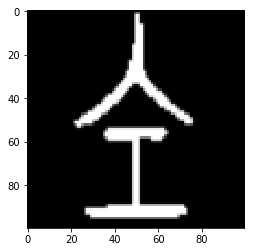

In [46]:
plt.imshow(testing_data[45][0], cmap='gray')
plt.show()

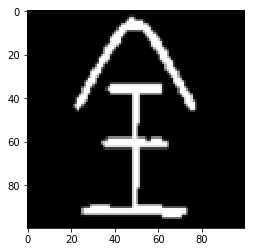

In [49]:
plt.imshow(training_data[np.argmin(list_of_scores)][0], cmap='gray')
plt.show()


In [55]:
def model_accuracy(array_of_test_images, finger_print_data):
    test_number = 0
    correctly_guessed = 0
    for x in array_of_test_images:
        test_number += 1
        list_of_scores = fingerprint_test(x, finger_print_data)
        
        
        
        array_index = np.argmin([y[0] for y in list_of_scores])
        if finger_print_data[array_index][2] + "-" + finger_print_data[array_index][3] == x[1] + "-" +x[2]:
            correctly_guessed += 1
    return correctly_guessed/test_number

In [56]:
model_accuracy(testing_data, finger_print)

0.63